# Inicialización

In [44]:
# @title
!pip install pandas
!pip install seaborn
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/titanic_.csv')

In [45]:
# @title
df.dtypes

Survived         int64
Pclass           int64
Name            object
Sex             object
Age_interval    object
SibSp            int64
Parch            int64
Ticket          object
Fare_iterval     int64
Cabin           object
Embarked        object
dtype: object

Remove Nulls

In [46]:
# @title
pd.isnull(df).sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age_interval    0
SibSp           0
Parch           0
Ticket          0
Fare_iterval    0
Cabin           0
Embarked        2
dtype: int64

In [47]:
# @title
df.dropna(subset=['Embarked'], inplace=True)
pd.isnull(df).sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age_interval    0
SibSp           0
Parch           0
Ticket          0
Fare_iterval    0
Cabin           0
Embarked        0
dtype: int64

In [48]:
# @title
df.describe()

,Survived,Pclass,SibSp,Parch,Fare_iterval
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.524184,0.382452,1.613048
std,0.486260,0.834700,1.103705,0.806761,1.436685
min,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,6.000000


# Analisis

## Survived
Indica si el pasajero sobrevivio o no al incidente.

* Sobrevivio 1
* No sobrevivio 0

In [69]:
# @title
df.groupby('Survived')['Name'].count()

Survived
no     549
yes    340
Name: Name, dtype: int64

Por sentaje de

In [71]:
# @title
deathPer = df.groupby('Survived')['Name'].count()[0]/(df.groupby('Survived')['Name'].count()[0]+df.groupby('Survived')['Name'].count()[1])

print(f"Porcentaje de muertos: {deathPer} \nPorcentaje de supervivientes: {1-deathPer}")

Porcentaje de muertos: 0.6175478065241845 
Porcentaje de supervivientes: 0.3824521934758155


## Pclass

El campo cuenta con 3 valores 1, 2, y 3 que indican la clase del pasajero.

In [50]:
# @title
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

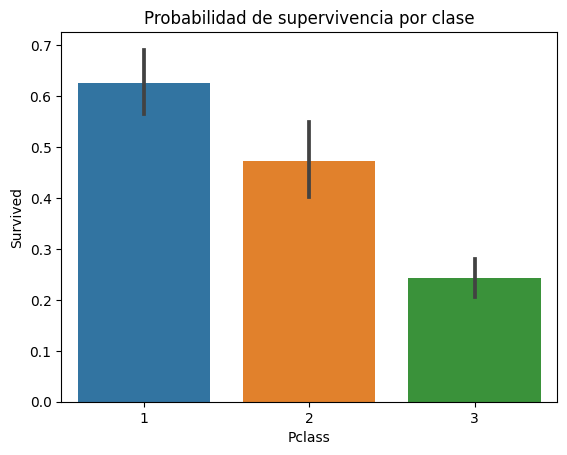

In [51]:
# @title
plot = sns.barplot(x = 'Pclass', y = 'Survived', data = df).set(title='Probabilidad de supervivencia por clase')

## Name

El campo indica el apellido del pasajero

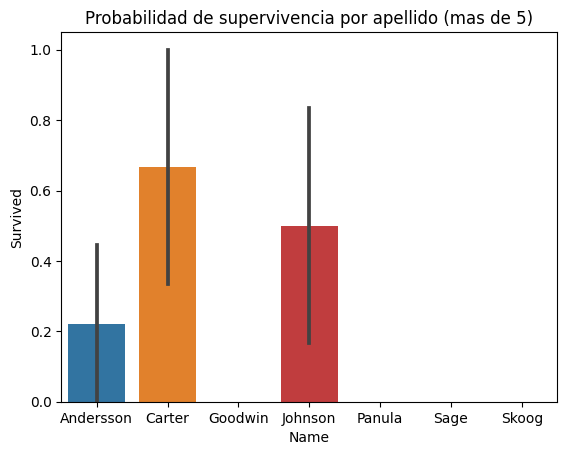

In [52]:
# @title
df['id'] = df.reset_index().index
name_count = df.groupby(["Name"])["id"].count().reset_index(name="Count")
name_count = pd.merge(name_count[name_count.Count > 5], df, on='Name', how='inner')

plot = sns.barplot(x = 'Name', y = 'Survived', data = name_count).set(title='Probabilidad de supervivencia por apellido (mas de 5)')

## Sex

El campo indica el sexo del pasajero.
* Male
* Female

In [53]:
# @title
df.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

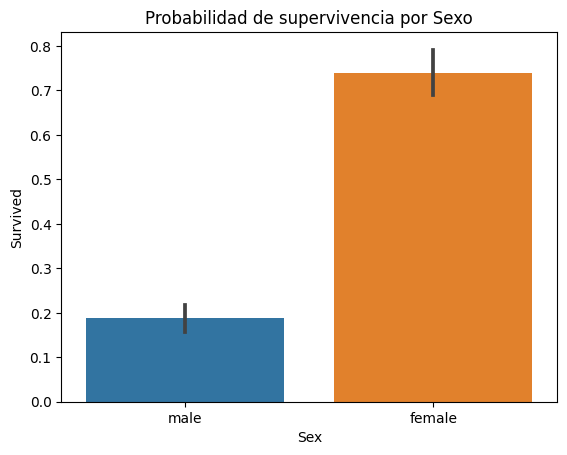

In [54]:
# @title
plot = sns.barplot(x = 'Sex', y = 'Survived', data = df).set(title='Probabilidad de supervivencia por Sexo')

## Age_interval

intervalo de edad (1:0-10, 2:11-20, 3:21-30, 4:31-40, 5:41-50, 6:>51, ?: no hay info)

In [55]:
# @title
df.groupby('Age_interval')['Survived'].mean()

Age_interval
1    0.612903
2    0.386792
3    0.351351
4    0.432927
5    0.395349
6    0.361111
?    0.293785
Name: Survived, dtype: float64

Remplazamos los ? por 3 ya que es la moda, media y mediana

In [56]:
# @title
df['Age_interval'] = df['Age_interval'].replace('?', 3)

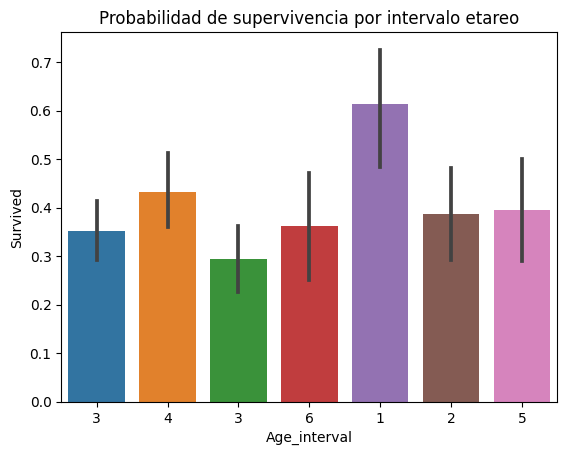

In [57]:
# @title
plot = sns.barplot(x = 'Age_interval', y = 'Survived', data = df).set(title='Probabilidad de supervivencia por intervalo etareo')

## SibSp

Indica la cantidad de hermanos mas esposas.

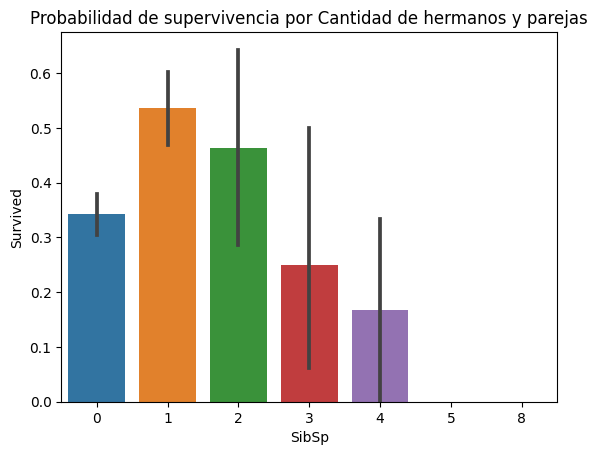

In [58]:
# @title
plot = sns.barplot(x = 'SibSp', y = 'Survived', data = df).set(title='Probabilidad de supervivencia por Cantidad de hermanos y parejas')

## Parch

Indica la cantidad de padres o hijos en la embarcación.

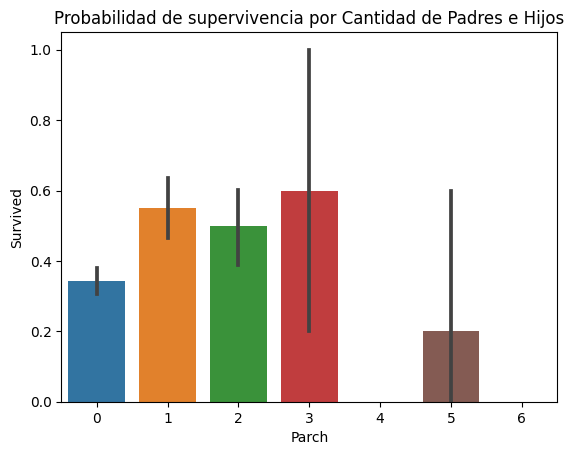

In [59]:
# @title
plot = sns.barplot(x = 'Parch', y = 'Survived', data = df).set(title='Probabilidad de supervivencia por Cantidad de Padres e Hijos')

## Relatives

Indica la cantidad de familiares en la embarcación de cada pasajero

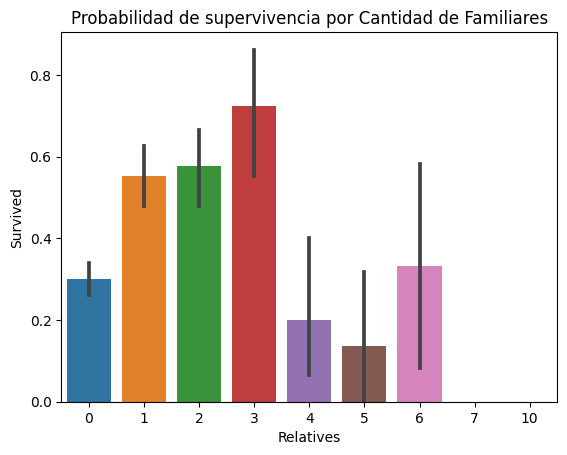

In [60]:
# @title
df['Relatives'] = df['Parch'] + df['SibSp']
plot = sns.barplot(x = 'Relatives', y = 'Survived', data = df).set(title='Probabilidad de supervivencia por Cantidad de Familiares')

## Ticket

Contiene informacion (numeros y letras) del ticket del pasajero

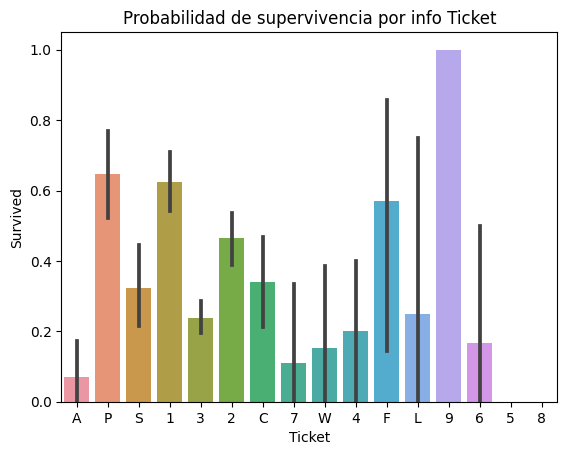

In [61]:
# @title
plot = sns.barplot(x = 'Ticket', y = 'Survived', data = df).set(title='Probabilidad de supervivencia por info Ticket')

## Fare_iterval

In [66]:
# @title
df.groupby('Fare_iterval')['Survived'].count()

Fare_iterval
1    704
2     60
3     34
4     19
6     72
Name: Survived, dtype: int64

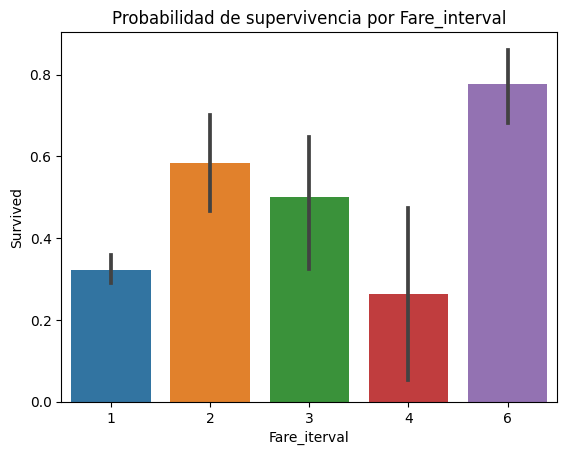

In [62]:
# @title
plot = sns.barplot(x = 'Fare_iterval', y = 'Survived', data = df).set(title='Probabilidad de supervivencia por Fare_interval')

## Cabin
Representa la cabina del pasajero

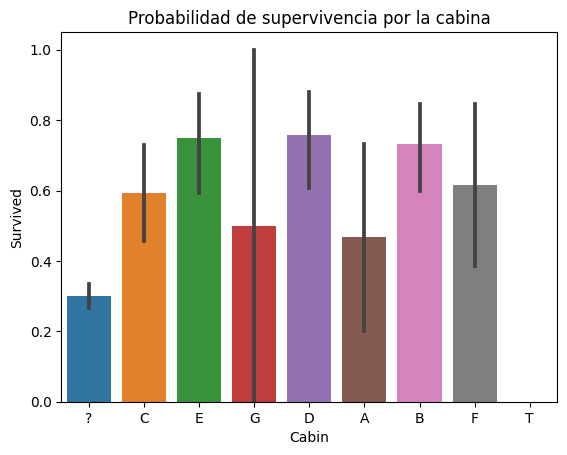

In [63]:
# @title
plot = sns.barplot(x = 'Cabin', y = 'Survived', data = df).set(title='Probabilidad de supervivencia por la cabina')

## Embarked

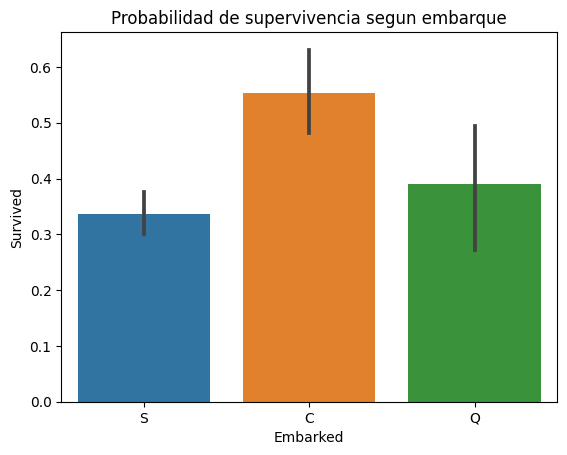

In [64]:
# @title
plot = sns.barplot(x = 'Embarked', y = 'Survived', data = df).set(title='Probabilidad de supervivencia segun embarque')

# Make CSV

In [65]:
# @title
def isChild(x):
    if (x == '1'):
        return "yes"
    else:
        return "no"

def isAlive(x):
    if (x == 1):
        return "yes"
    else:
        return "no"

columns_to_remove = ['id']

df.drop(columns_to_remove, axis = 1, inplace = True)

df['Is_child'] = df['Age_interval'].apply(isChild)
df['Survived'] = df['Survived'].apply(isAlive)
df.to_csv("new_titanic.csv")
df

,Survived,Pclass,Name,Sex,Age_interval,SibSp,Parch,Ticket,Fare_iterval,Cabin,Embarked,Relatives,Is_child
0,no,3,Braund,male,3,1,0,A,1,?,S,1,no
1,yes,1,Cumings,female,4,1,0,P,6,C,C,1,no
2,yes,3,Heikkinen,female,3,0,0,S,1,?,S,0,no
3,yes,1,Futrelle,female,4,1,0,1,1,C,S,1,no
4,no,3,Allen,male,4,0,0,3,1,?,S,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,no,2,Montvila,male,3,0,0,2,1,?,S,0,no
887,yes,1,Graham,female,2,0,0,1,1,B,S,0,no
888,no,3,Johnston,female,3,1,2,W,1,?,S,3,no
889,yes,1,Behr,male,3,0,0,1,1,C,C,0,no
